In [1]:
import numpy as np 
import os 
import pandas as pd 

In [2]:
# 1876
full_class_infoTable = pd.read_csv('../panoramic_view/clusters_all.csv')

In [3]:
mmbs = []
mmbs_name = []
for i in range(len(full_class_infoTable)):
    f = full_class_infoTable['full_cluster_2'].iloc[i]
    t = full_class_infoTable['tract_cluster_2'].iloc[i]
    a = full_class_infoTable['arbor_cluster_3'].iloc[i]
    b = full_class_infoTable['bouton_cluster_2'].iloc[i]
    m = 'F'+str(f)+'T'+str(t)+'A'+str(a)+'B'+str(b)
    m2 = str(f)+str(t)+str(a)+str(b)
    mmbs.append(m2)
    mmbs_name.append(m)

In [4]:
mmbs = np.array(mmbs)
mmbs_name = np.array(mmbs_name)
proj21 = np.array(full_class_infoTable['p21'])
soma_r = np.array(full_class_infoTable['Soma_region'])
layers = np.array(full_class_infoTable['Cortical_layer'])
soma_R = np.array(full_class_infoTable['region_rough'])


In [6]:
full_feature_table = pd.read_csv('../panoramic_view/all_level_featureTable.csv')

In [7]:
full_corres_label = []
for i in range(len(full_feature_table)):
    name = full_feature_table['name'].iloc[i]
    row_id = full_class_infoTable[full_class_infoTable['Name']==name].index[0]
    l = full_class_infoTable.iloc[row_id][['full_cluster_2','tract_cluster_2','arbor_cluster_3','bouton_cluster_2']].values 
    full_corres_label.append(l)
full_corres_label = np.array(full_corres_label)

In [8]:
col_select = ['Nodes', 'Stems', 'Bifurcations', 'Branches', 'Tips',
       'OverallWidth', 'OverallHeight', 'OverallDepth', 
       'Length', 'Volume_x', 'MaxEuclideanDistance',
       'MaxPathDistance', 'MaxBranchOrder', 'AverageContraction',
       'AverageFragmentation', 'AverageParent-daughterRatio',
       'AverageBifurcationAngleLocal', 'AverageBifurcationAngleRemote',
       'HausdorffDimension', 'Bouton Number', 'TEB Ratio', 'Bouton Density',
       'Geodesic Distance', 'Bouton Interval', 'Project Regions',
       'Segment Number', 'PathLength', 'EucLength', 'OrientX', 'OrientY',
       'OrientZ', 'Volume_y', 'max_density_basal', 'nodes_basal',
       'p_length_basal', 'volume_basal', 'branch_basal', 'd_to_soma_basal',
       'd_to_soma2_basal', 'hub_basal', 'variance_ratio_basal',
       'max_density_apical', 'nodes_apical', 'p_length_apical',
       'volume_apical', 'branch_apical', 'd_to_soma_apical',
       'd_to_soma2_apical', 'hub_apical', 'variance_ratio_apical',
       'max_density_a1', 'num_nodes_a1', 'total_path_length_a1', 'volume_a1',
       'branch_a1', 'd_to_soma_a1', 'd_to_soma2_a1', 'hub_a1',
       'variance_ratio_a1', 'max_density_a2', 'num_nodes_a2',
       'total_path_length_a2', 'volume_a2', 'branch_a2', 'd_to_soma_a2',
       'd_to_soma2_a2', 'hub_a2', 'variance_ratio_a2', 'max_density_a3',
       'num_nodes_a3', 'total_path_length_a3', 'volume_a3', 'branch_a3',
       'd_to_soma_a3', 'd_to_soma2_a3', 'hub_a3', 'variance_ratio_a3',
       'max_density_a4', 'num_nodes_a4', 'total_path_length_a4', 'volume_a4',
       'branch_a4', 'd_to_soma_a4', 'd_to_soma2_a4', 'hub_a4',
       'variance_ratio_a4']

In [9]:
full_feature_standard2 = (full_feature_table[col_select] - np.mean(full_feature_table[col_select],axis=0))/np.std(full_feature_table[col_select],axis=0)

In [10]:
import pymrmr

In [16]:
col_range = [0,19,19,26,26,32,32,86]
for i in range(4):
    tmp_ff = full_feature_standard2[full_feature_standard2.columns[col_range[2*i]:col_range[2*i+1]]]
    tmp_ff.insert(0,'cluster_id',full_corres_label[:,3])
    f_names = pymrmr.mRMR(tmp_ff,'MIQ',10)
    print(f_names)



 *** This program and the respective minimum Redundancy Maximum Relevance (mRMR) 
     algorithm were developed by Hanchuan Peng <hanchuan.peng@gmail.com>for
     the paper 
     "Feature selection based on mutual information: criteria of 
      max-dependency, max-relevance, and min-redundancy,"
      Hanchuan Peng, Fuhui Long, and Chris Ding, 
      IEEE Transactions on Pattern Analysis and Machine Intelligence,
      Vol. 27, No. 8, pp.1226-1238, 2005.


*** MaxRel features ***
Order 	 Fea 	 Name 	 Score
1 	 11 	 MaxEuclideanDistance 	 0.209
2 	 7 	 OverallHeight 	 0.182
3 	 8 	 OverallDepth 	 0.177

*** mRMR features *** 
Order 	 Fea 	 Name 	 Score
1 	 11 	 MaxEuclideanDistance 	 0.209
2 	 15 	 AverageFragmentation 	 1.109
3 	 19 	 HausdorffDimension 	 0.971
['MaxEuclideanDistance', 'AverageFragmentation', 'HausdorffDimension']


 *** This program and the respective minimum Redundancy Maximum Relevance (mRMR) 
     algorithm were developed by Hanchuan Peng <hanchuan.peng@gmail.co

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

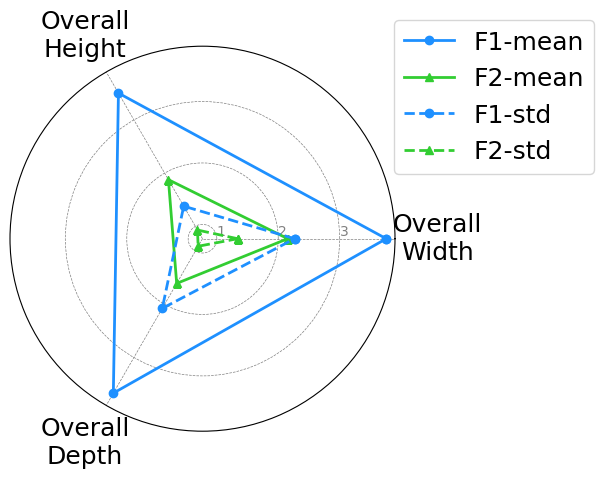

In [19]:
np.random.seed(42)
# f_names = ['AverageBifurcationAngleRemote','OverallWidth','AverageFragmentation','MaxBranchOrder','OverallHeight','OverallDepth']
# f_names_l = ['Average\nBifurcation\nAngle Remote','Overall\nWidth','Average\nFragmentation','MaxBranch\nOrder','Overall\nHeight','Overall\nDepth']
f_names = ['OverallWidth','OverallHeight','OverallDepth']
f_names_l = ['Overall\nWidth','Overall\nHeight','Overall\nDepth']

data_length = 3
data = {
    "F1-mean": np.array(full_feature_table[full_corres_label[:,0]==1][f_names].mean()),
    "F2-mean": np.array(full_feature_table[full_corres_label[:,0]==2][f_names].mean()),
    "F1-std": np.array(full_feature_table[full_corres_label[:,0]==1][f_names].std()),
    "F2-std": np.array(full_feature_table[full_corres_label[:,0]==2][f_names].std())
}
angles = np.linspace(0,2*np.pi, data_length,endpoint=False).tolist()
angles += angles[:1]

fig,ax = plt.subplots(figsize=(5,5),subplot_kw=dict(polar=True))
plt.xticks(angles[:-1],f_names_l,fontsize=18)
ax.set_rlabel_position(0)
plt.yticks([0,1000,2000,3000,4000],['0','1','2','3','4'],color='grey',size=10)
# plt.ylim(-5,10)
styles = {
    "F1-mean": {"color":"dodgerblue","marker":"o","line":"-"},
    "F2-mean": {"color":"limegreen","marker":"^","line":"-"},
    "F1-std": {"color":"dodgerblue","marker":"o","line":"--"},
    "F2-std": {"color":"limegreen","marker":"^","line":"--"}
}

for label, values in data.items():
    vals = list(values)
    vals += vals[:1]
    style = styles[label]

    ax.plot(angles,vals,color = style['color'],linewidth=2,marker=style['marker'],label = label,
            linestyle = style['line'])
ax.grid(color='grey',linestyle='--',linewidth=0.5)
ax.tick_params(axis='x',pad=20)
plt.legend(loc='upper right',bbox_to_anchor=(1.55,1.1),fontsize=18)
# plt.savefig('figs_stats/full_size.png',dpi=300,bbox_inches='tight')

In [21]:
from matplotlib.colors import LinearSegmentedColormap
colorlist_box = ['dodgerblue','crimson','limegreen']
cmp_box = LinearSegmentedColormap.from_list("a",colorlist_box)

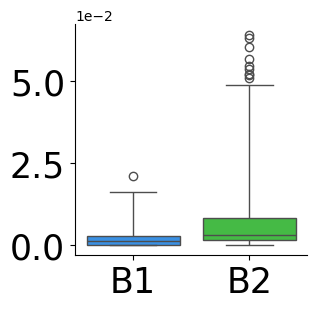

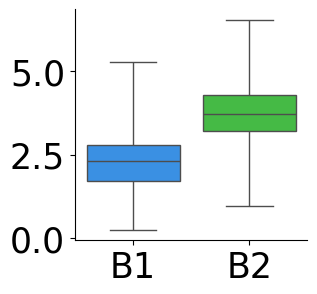

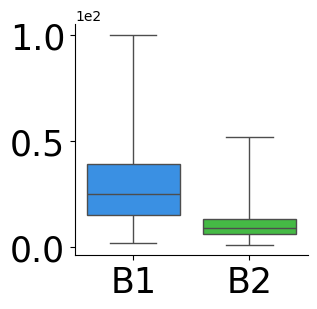

In [41]:
for i in ['TEB Ratio','Bouton Density','Project Regions']:
    rows = full_feature_table[full_corres_label[:,3]!=-1][i]
    tmp_df = pd.DataFrame(columns=['feature','label'])
    tmp_df['feature'] = rows 
    tmp_df['label'] = full_corres_label[full_corres_label[:,3]!=-1,3]

    # Q1 = np.percentile(tmp_df['feature'],25)
    # Q3 = np.percentile(tmp_df['feature'],75)
    # IQR = Q3-Q1

    # lowerbound = Q1-2*IQR
    # upperbound = Q3+2*IQR

    fig,ax = plt.subplots(figsize=(3,3))
    sns.boxplot(x='label',y='feature',hue = 'label',data= tmp_df, palette=cmp_box,showfliers=True,
                whis = 6)
    plt.xticks([0,1],['B1','B2'])
    plt.tick_params(axis='x',labelsize=25,rotation=0)
    plt.tick_params(axis='y',labelsize=25)
    # plt.legend(fontsize=14)
    plt.ylabel('')
    plt.xlabel('')
    plt.legend().remove()
    plt.ticklabel_format(axis='y',style='sci',scilimits=(0,0))
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    # plt.savefig('figs_stats/B_TEB.png',dpi=300,bbox_inches='tight')
    # plt.close() 

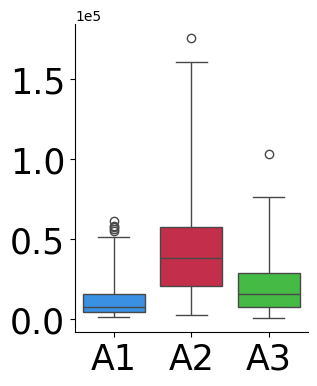

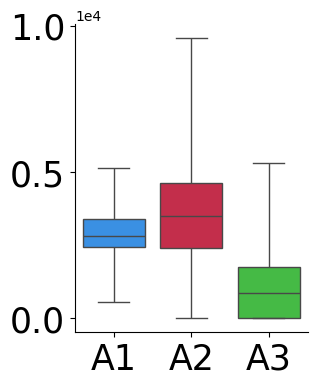

In [42]:
for i in ['total_path_length_a1','d_to_soma_a2']:
    rows = full_feature_table[full_corres_label[:,2]!=-1][i]
    tmp_df = pd.DataFrame(columns=['feature','label'])
    tmp_df['feature'] = rows 
    tmp_df['label'] = full_corres_label[full_corres_label[:,2]!=-1,2]

    # Q1 = np.percentile(tmp_df['feature'],25)
    # Q3 = np.percentile(tmp_df['feature'],75)
    # IQR = Q3-Q1

    # lowerbound = Q1-2*IQR
    # upperbound = Q3+2*IQR

    fig,ax = plt.subplots(figsize=(3,4))
    sns.boxplot(x='label',y='feature',hue = 'label',data= tmp_df, palette=cmp_box,showfliers=True,
                whis = 3)
    plt.xticks([0,1,2],['A1','A2','A3'])
    plt.tick_params(axis='x',labelsize=25,rotation=0)
    plt.tick_params(axis='y',labelsize=25)
    # plt.legend(fontsize=14)
    plt.ylabel('')
    plt.xlabel('')
    plt.legend().remove()
    plt.ticklabel_format(axis='y',style='sci',scilimits=(0,0))
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    # plt.savefig('figs_stats/B_TEB.png',dpi=300,bbox_inches='tight')
    # plt.close() 

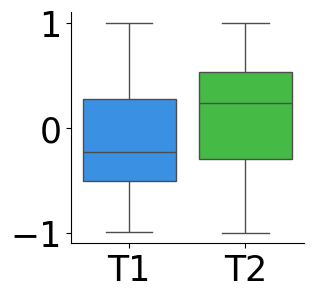

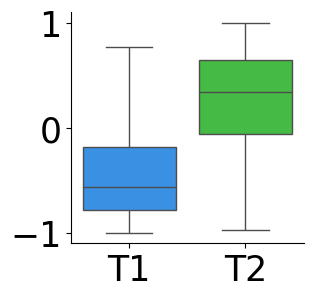

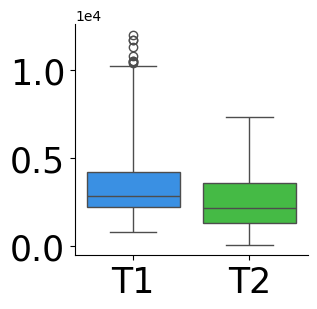

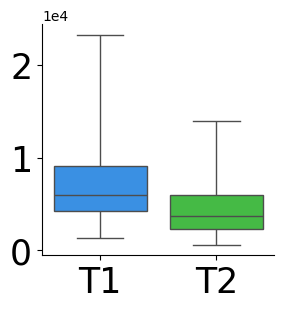

In [34]:
for i in ['OrientZ','OrientY','EucLength','PathLength']:
    rows = full_feature_table[full_corres_label[:,1]!=-1][i]
    tmp_df = pd.DataFrame(columns=['feature','label'])
    tmp_df['feature'] = rows 
    tmp_df['label'] = full_corres_label[full_corres_label[:,1]!=-1,1]

    # Q1 = np.percentile(tmp_df['feature'],25)
    # Q3 = np.percentile(tmp_df['feature'],75)
    # IQR = Q3-Q1

    # lowerbound = Q1-2*IQR
    # upperbound = Q3+2*IQR

    fig,ax = plt.subplots(figsize=(3,3))
    sns.boxplot(x='label',y='feature',hue = 'label',data= tmp_df, palette=cmp_box,showfliers=True,
                whis = 3)
    plt.xticks([0,1],['T1','T2'])
    plt.tick_params(axis='x',labelsize=25,rotation=0)
    plt.tick_params(axis='y',labelsize=25)
    # plt.legend(fontsize=14)
    plt.ylabel('')
    plt.xlabel('')
    plt.legend().remove()
    plt.ticklabel_format(axis='y',style='sci',scilimits=(0,0))
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    # plt.savefig('figs_stats/B_TEB.png',dpi=300,bbox_inches='tight')
    # plt.close() 

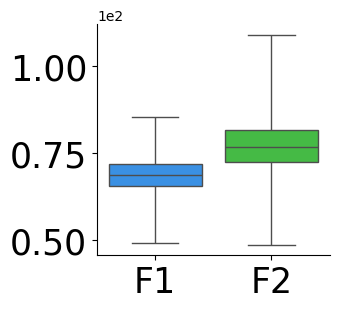

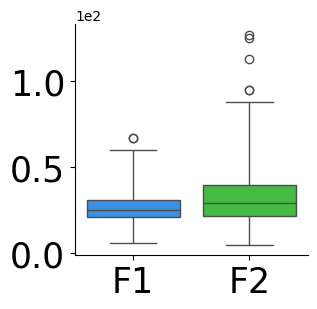

In [43]:
for i in ['AverageBifurcationAngleRemote','MaxBranchOrder']:
    rows = full_feature_table[full_corres_label[:,0]!=-1][i]
    tmp_df = pd.DataFrame(columns=['feature','label'])
    tmp_df['feature'] = rows 
    tmp_df['label'] = full_corres_label[full_corres_label[:,0]!=-1,0]

    # Q1 = np.percentile(tmp_df['feature'],25)
    # Q3 = np.percentile(tmp_df['feature'],75)
    # IQR = Q3-Q1

    # lowerbound = Q1-2*IQR
    # upperbound = Q3+2*IQR

    fig,ax = plt.subplots(figsize=(3,3))
    sns.boxplot(x='label',y='feature',hue = 'label',data= tmp_df, palette=cmp_box,showfliers=True,
                whis = 3)
    plt.xticks([0,1],['F1','F2'])
    plt.tick_params(axis='x',labelsize=25,rotation=0)
    plt.tick_params(axis='y',labelsize=25)
    # plt.legend(fontsize=14)
    plt.ylabel('')
    plt.xlabel('')
    plt.legend().remove()
    plt.ticklabel_format(axis='y',style='sci',scilimits=(0,0))
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    # plt.savefig('figs_stats/B_TEB.png',dpi=300,bbox_inches='tight')
    # plt.close() 

In [44]:
#### passby regions
import sys
sys.path.append("../pylib-main")
from file_io import load_image
from anatomy.anatomy_config import REGION671,MASK_CCF25_FILE

In [45]:
ccf_mask = load_image(MASK_CCF25_FILE)

In [47]:
import glob

In [49]:
#### trajectory 
tract_files = glob.glob('/home/penglab/Desktop/MyFiles/Projects/V1876/tract/CCFv3/*')
traj_dict = {}
traj_strat_end = {}
all_p = []
for f in tract_files:
    swc = pd.read_csv(f,sep=' ',comment='#',header=None,usecols=[0,1,2,3,4,5,6])
    swc.columns = ['##n','type','x','y','z','r','parent']
    name_tmp = os.path.basename(f).split('_axonal')[0]
    if 'pre' in name_tmp:
        cut_id = name_tmp.index('pre')
        name = name_tmp[cut_id:]
    else:
        cut1 = name_tmp.index('1')
        if name_tmp[cut1:][1] == '_':
            cut1 = name_tmp[cut1+1:].index('1')+cut1+1
        name = name_tmp[cut1:]
        if '2' in name_tmp:
            cut2 = name_tmp.index('2')
            if cut2 < cut1:
                name = name_tmp[cut2:]
    coords = (swc[['x','y','z']].values/25).astype(int)
    coords = coords[(coords[:,0]<528)&(coords[:,1]<320)&(coords[:,2]<456),:]
    r_ids = ccf_mask[coords[:,2],coords[:,1],coords[:,0]]
    unique_rid = np.unique(r_ids)
    traj_dict[name] = unique_rid
    soma = full_class_infoTable[full_class_infoTable['Name'] == name]['Soma_region'].values[0]
    swc2 = swc[(swc['z']<11400)&(swc['x']<13200)]
    tip_n1 = list(set(swc['##n']) - set(swc['parent']))
    tip_id1 = swc[swc['##n'] == tip_n1[0]].index[0]
    tip_n = list(set(swc2['##n']) - set(swc2['parent']))
    if len(tip_n)>1:
        n = 0
        d = 1000
        for j in range(len(tip_n)):
            tmp_id = swc2[swc2['##n'] == tip_n[j]].index[0]
            tmp_d = np.sqrt(np.sum(swc.loc[tip_id1,['x','y','z']].values - swc.loc[tmp_id,['x','y','z']].values)**2)
            if tmp_d<d:
                d= tmp_d 
                n = j
    else:
        j = 0
    tip_id = swc2[swc2['##n'] == tip_n[j]].index[0]
    tip_xyz = (swc2.loc[tip_id,['x','y','z']].values/25).astype(int)
    tip_r = ccf_mask[tip_xyz[2],tip_xyz[1],tip_xyz[0]]
    if tip_xyz[2] > 228:
        ic = 1
    else:
        ic = 0
    while tip_r == 0:
        tip_id = swc[swc['##n'] == swc.loc[tip_id,'parent']].index[0]
        tip_xyz = (swc.loc[tip_id,['x','y','z']].values/25).astype(int)
        if (tip_xyz[0] >= 528)| (tip_xyz[2]>= 456):
            continue
        tip_r = ccf_mask[tip_xyz[2],tip_xyz[1],tip_xyz[0]]
    traj_strat_end[name] = [soma,tip_r,ic]
    all_p = all_p + list(unique_rid)

In [50]:
major_BS_name2 = ['OLF','Isocortex','HPF','CTXsp','TH','STR','PAL','MB','MY','P','CB','HY']

In [51]:
import json
tree_json_path = '../microenvironment/tree_yzx.json'
with open(tree_json_path, 'r') as file:
    tree_json = json.load(file) 

In [52]:
brain_to_id = {}
id_to_brain = {}
brain_id_path = {}
for i in range(len(tree_json)):
    bid = tree_json[i]['id']
    acronym = tree_json[i]['acronym']
    p = tree_json[i]['structure_id_path']
    if bid not in brain_to_id:
        brain_to_id[bid] = acronym
        id_to_brain[acronym] = bid
    if bid not in brain_id_path:
        brain_id_path[bid] = p 

In [53]:
all_p = list(set(all_p))
tmp_order = [[] for i in range(len(major_BS_name2))]
all_p_reorder = []
for i in all_p:
    if i == 0:
        continue
    p = brain_id_path[i]
    for j in range(len(major_BS_name2)):
        if id_to_brain[major_BS_name2[j]] in p:
            tmp_order[j].append(brain_to_id[i])
for m in tmp_order:
    all_p_reorder = all_p_reorder + m 

In [54]:
se_m = np.zeros((len(major_BS_name2),2*len(major_BS_name2)))
R_stoE = {}
for i in range(2):
    tmp = se_m.copy()
    R_stoE[i+1] = tmp

In [55]:
traj_r_count = np.zeros((len(full_class_infoTable),len(all_p_reorder)))
n = 0
c_arbor = []
c_tract = []
c_full = []
for k, v in traj_dict.items():
    if k[1] == '_':
        k = k[2:]
    if k in list(full_class_infoTable['Name']):
        row_id = full_class_infoTable[full_class_infoTable['Name'] == k].index[0]
        c_arbor.append(full_class_infoTable['arbor_cluster_3'].iloc[row_id])
        c_tract.append(full_class_infoTable['tract_cluster_2'].iloc[row_id])
        c_full.append(full_class_infoTable['full_cluster_2'].iloc[row_id])
        for i in v:
            if i == 0:
                continue
            if brain_to_id[i] not in all_p_reorder:
                continue
            pos = all_p_reorder.index(brain_to_id[i])
            traj_r_count[n,pos] += 1
        n += 1

In [56]:
c_tract = np.array(c_tract)

In [57]:
n = 0
for k,v in traj_strat_end.items():
    c = c_tract[n]
    s = v[0]
    tr = v[1]
    ic = v[2]
    if c == -1:
        n += 1
        continue
    p1 = brain_id_path[tr]
    for mb1 in range(len(major_BS_name2)):
        if id_to_brain[major_BS_name2[mb1]] in p1:
            y = mb1
    p2 = brain_id_path[id_to_brain[s]]
    for mb2 in range(len(major_BS_name2)):
        if id_to_brain[major_BS_name2[mb2]] in p2:
            x = mb2 
    if ic == 1:
        R_stoE[c][x,y+len(major_BS_name2)] =  R_stoE[c][x,y+len(major_BS_name2)]+1
    else:
        R_stoE[c][x,y] = R_stoE[c][x,y] + 1   
    n += 1

In [58]:
slist = []
tlist =[]
clist = []
clusterlist = []
n = 0
for i in range(1,3):
    for j in range(R_stoE[i].shape[0]):
        for k in range(len(major_BS_name2)):
            if R_stoE[i][j,k] > 0:
                slist.append(major_BS_name2[j])
                tlist.append('ipsi_'+major_BS_name2[k])
                clist.append(R_stoE[i][j,k])
                clusterlist.append(i)
        for k in range(len(major_BS_name2),2*len(major_BS_name2)):
            if R_stoE[i][j,k] > 0:
                slist.append(major_BS_name2[j])
                tlist.append('contra_'+major_BS_name2[k-len(major_BS_name2)])
                clist.append(R_stoE[i][j,k])
                clusterlist.append(i)
rough_stoE = pd.DataFrame({'s':slist,'t':tlist,'c':clist,'cluster':clusterlist})

In [59]:
import plotly.express as px
import pyvista as pv
import vtk
import networkx as nx

In [60]:
vtk_folder = '/home/penglab/Desktop/MyFiles/Projects/Data/vtk'
BS_centroid = []
for i in major_BS_name2:
    vtk_file = vtk_folder+'/'+i+'.vtk'
    vtk_mask = pv.read(vtk_file)
    points = vtk_mask.points
    z_values = points[:,2]
    points = points[z_values < 228]
    BS_centroid.append(np.mean(points,axis=0))
BS_centroid = np.array(BS_centroid)

In [61]:
colors_tract = ['salmon','dodgerblue']
edge_colors = []
edge_widths = []
edges = []
positions = {}
for i in range(len(major_BS_name2)):
    positions[major_BS_name2[i]] =[BS_centroid[i][0]/100,BS_centroid[i][2]/100]
    positions['contra_'+major_BS_name2[i]] = [BS_centroid[i][0]/100,4.56-BS_centroid[i][2]/100]
for i in range(len(rough_stoE)):
    # w = np.log(rough_stoE['c'].iloc[i]+1)*4
    w = rough_stoE['c'].iloc[i]/2.5
    c_id = rough_stoE['cluster'].iloc[i]-1
    edge_widths.append(w)
    edge_colors.append(colors_tract[c_id])
    tR = rough_stoE['t'].iloc[i]
    if 'contra' in tR:
        R = tR
    else:
        R = tR.split('_')[1]
    edges.append((rough_stoE['s'].iloc[i],R,w))

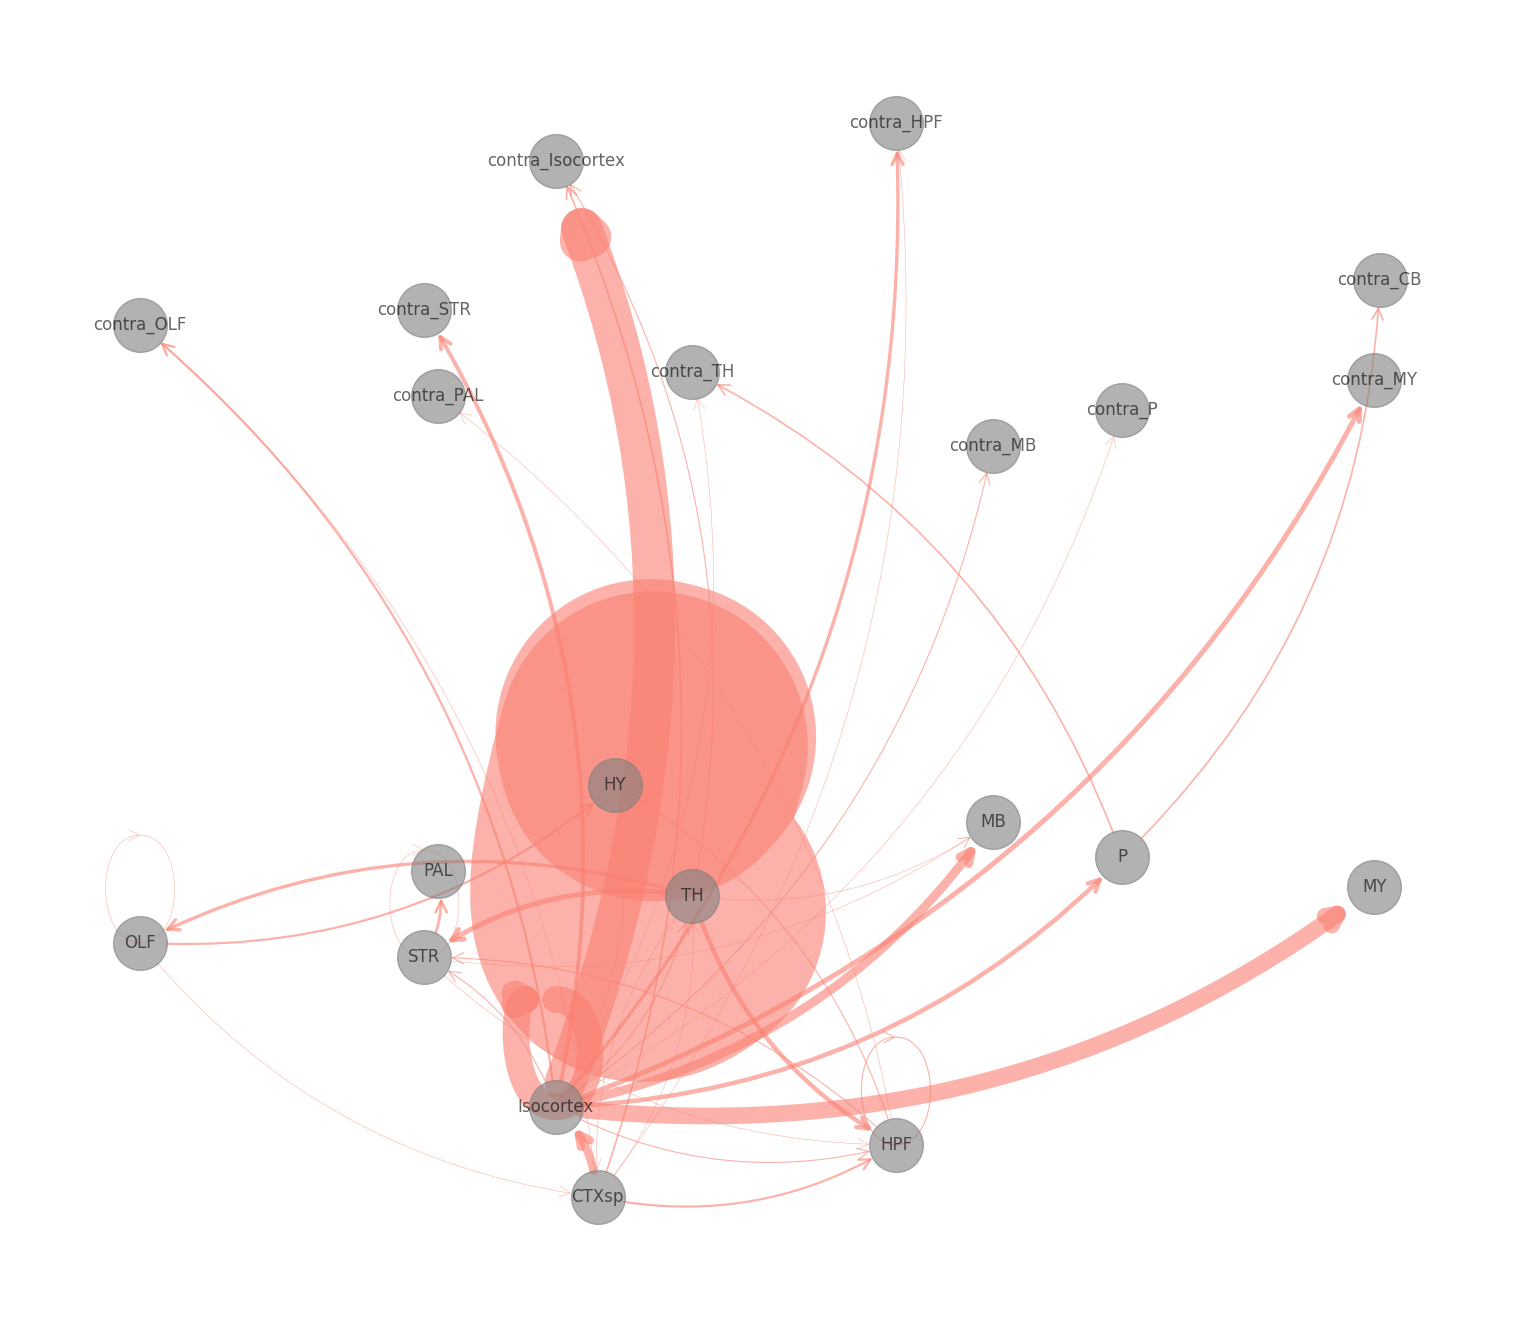

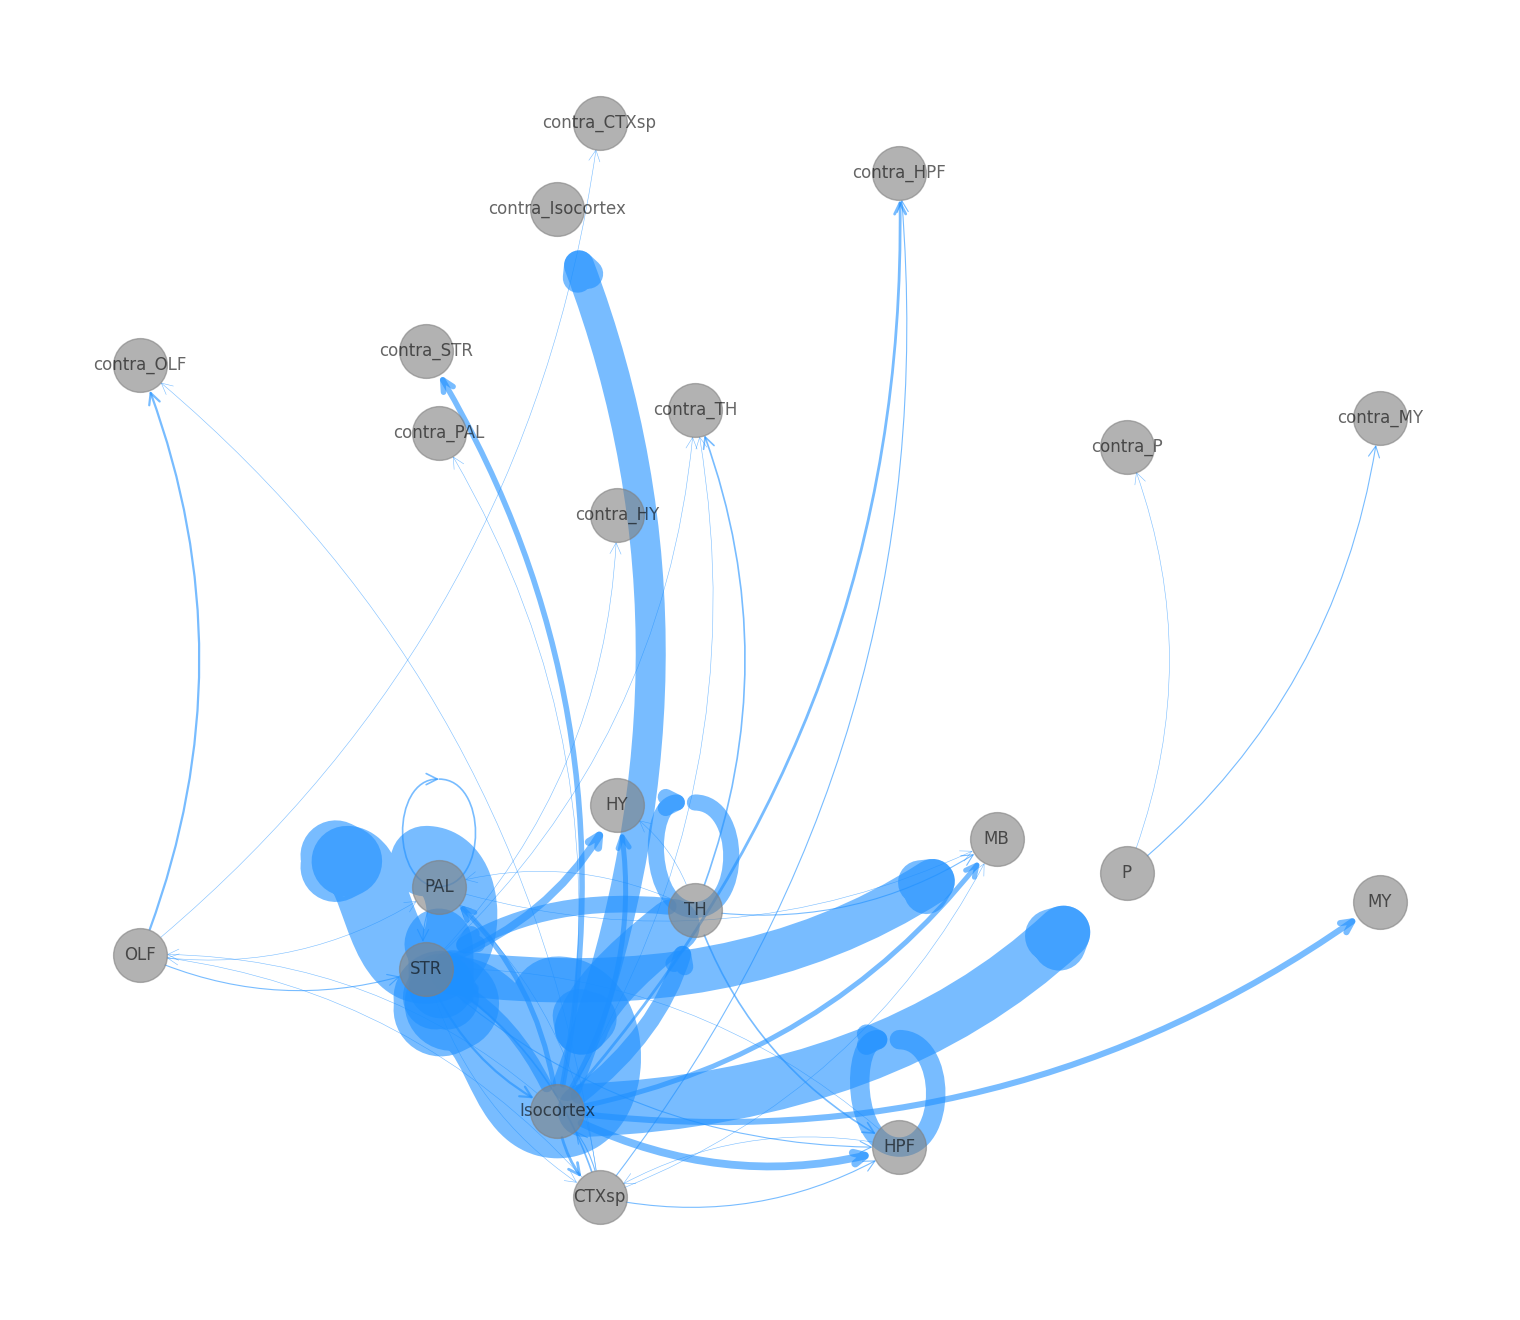

In [62]:
# plt.figure(figsize=(20,17))
# arc = [0.1,0.2,0.3,0.4,0.5]
for i in range(1,3):    
        G = nx.DiGraph()
        rows = rough_stoE[rough_stoE['cluster'] ==i]
        edge_colors2 = np.array(edge_colors)[(rough_stoE['cluster'] ==i)]
        # edge_widths2 = np.array(edge_widths)[(rough_stoE['cluster'] ==i)]
        edges_g = np.array(edges)[(rough_stoE['cluster'] ==i)]
        for j in edges_g:
                G.add_edge(j[0],j[1],weight = j[2])
        plt.figure(figsize=(15,13))
        nx.draw(G,pos = positions,with_labels=True,arrows=True,node_color='gray',alpha=0.6,
                edge_color=edge_colors2,node_size=1500,connectionstyle='arc3, rad = 0.2',
                # width=edge_widths2,arrowstyle = "->")
                width=[float(v['weight']) for (r,c,v) in G.edges(data=True)],
                arrowstyle = "->",arrowsize=20)
        # plt.savefig('figs_stats/tract_'+str(i)+'_nolabel.png',
        #         dpi=300,bbox_inches='tight')
        # plt.close()

In [65]:
from scipy.spatial.distance import cdist

In [66]:
percentile_bouton = np.zeros((len(full_class_infoTable),4))
percentile = [0.25,0.5,0.75,1]
for i in range(len(full_class_infoTable)):
    name = full_class_infoTable['Name'].iloc[i]
    f = '../panoramic_view/bouton_axon/'+name+'.swc'
    swc = pd.read_csv(f,sep=' ')
    name = os.path.basename(f).split('.')[0]
    xyz = full_class_infoTable[['soma_x','soma_y','soma_z']].values[i]
    dist_b = cdist(swc[['x','y','z']].values,xyz.reshape(1,3),metric ='euclidean')
    
    full_path = '/home/penglab/Desktop/MyFiles/Projects/V1876/full/resample80/'+name+'.swc'
    full_swc = pd.read_csv(full_path,sep=' ',usecols=[0,1,2,3,4,5,6],comment='#',header=None)
    full_swc.columns = swc.columns
    dist_f = cdist(full_swc[['x','y','z']].values,xyz.reshape(1,3),metric ='euclidean')
    max_fd = np.max(dist_f)
    for j in range(len(percentile)):
        if i == 0:
            t_min = 0
        else:
            t_min = max_fd*percentile[j-1]
        t_max = max_fd*percentile[j]
        n = np.sum((dist_b[:,0] <= t_max)&(dist_b[:,0] > t_min))
        percentile_bouton[i,j] = n

In [67]:
percentile_bouton_all = []
for i in range(2):
    percentile_bouton_all.append(np.mean(percentile_bouton[full_class_infoTable['bouton_cluster_2']==i+1],axis=0))
percentile_bouton_all = np.array(percentile_bouton_all)
percentile_bouton_p = percentile_bouton_all.copy()
for i in range(percentile_bouton_p.shape[0]):
    percentile_bouton_p[i,:] = percentile_bouton_p[i,:]/np.sum(percentile_bouton_p[i,:])

/tmp/ipykernel_3622/3755903187.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r*--" (-> color='r'). The keyword argument will take precedence.
  plt.plot(X,percentile_bouton_p[i,:],'r*--',color = color_p[i],


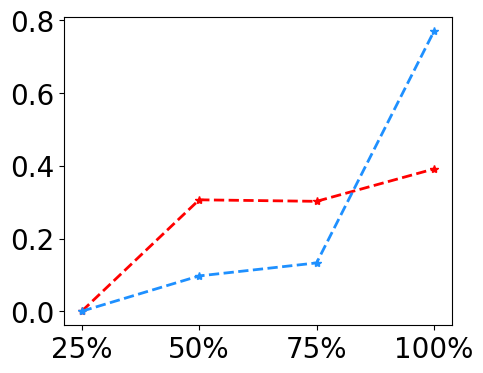

In [68]:
color_p = ['red','dodgerblue']
plt.figure(figsize=(5,4))
X = [i+0.5 for i in range(4)]
for i in range(percentile_bouton_p.shape[0]):
    plt.plot(X,percentile_bouton_p[i,:],'r*--',color = color_p[i],
             linewidth=2,label='B'+str(i+1))
plt.legend().set_visible(False)
plt.xticks(X,['25%','50%','75%','100%'])
plt.tick_params(labelsize=20)
# plt.savefig('figs_stats/num_percentile.png',dpi=300,bbox_inches='tight')